In [1]:
%matplotlib inline

In [16]:
import pathlib
import numpy as np
import pandas

from matplotlib import pylab

from multiprocessing import Pool

from scipy import signal

from kaskady2.analyze.fits import * 
from kaskady2.analyze.profile import *
from kaskady2.analyze.profile_fits import *
from kaskady2.analyze.fluctuation_treshold import *
from kaskady2.loader.reader import CascadeSetLoader
from kaskady2.utils import get_fwhm


In [6]:
cascades = CascadeSetLoader.find_cascades(
  pathlib.Path('/home/jb/kaskady-data/g4-production'), 
  cuts_kev={3000}, material_names={'G4_BGO'}, energies_mev={1125}
    
)
geometry = cascades[0].main_geometry


In [40]:
fluc = FluctuationCalculation.from_geometry(
    geometry, 0.9
)

In [41]:
values, bins = fluc.make_histogram(normed=True)
bincenters = 0.5*(bins[1:]+bins[:-1])

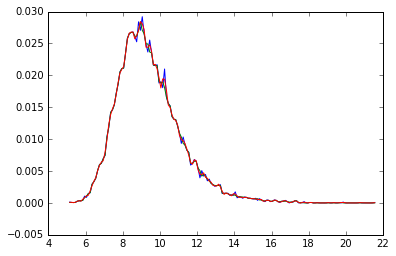

In [42]:
pylab.plot(bincenters, values)
meld = signal.medfilt(values)
pylab.plot(bincenters, meld)
savgol = signal.savgol_filter(values, window_length=7, polyorder=4, mode='constant', cval=0)
pylab.plot(bincenters, savgol)

In [43]:
fit = FitObject(
    FluctuationFitData(fluc), 
    WeibullFunc()
)

In [44]:
fit_fwhm = get_fwhm(
  ydata=WeibullFunc().fit_function(fit.data.xdata, 1, 5, +np.min(fit.data.xdata)),
  xdata=fit.data.xdata
)
fit_fwhm

0.5114477865706348

In [75]:
histo_fwhm = get_fwhm(
    xdata=fit.data.xdata, ydata=signal.medfilt(fit.data.ydata, kernel_size=5)
)
histo_fwhm

0.0

In [84]:

import math

import numpy as np
from scipy import interpolate
xdata=fit.data.xdata
ydata=signal.medfilt(fit.data.ydata, kernel_size=5)
ydata-=np.max(ydata)/2
spline = interpolate.UnivariateSpline(xdata, ydata, s=0)
roots = spline.roots()
math.fabs(np.min(roots) - np.max(roots)), roots

(0.0, array([ 7.31758255]))

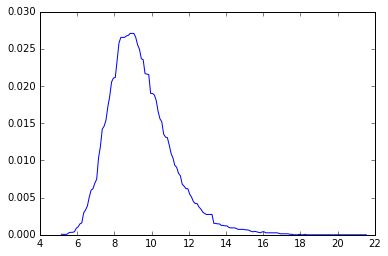

In [81]:
pylab.plot(xdata, ydata)

In [68]:
interpolate.sproot(spline, 1)

array([ 7.31758255])

In [71]:
#xdata


array([-0.01346667, -0.01346667, -0.01346667, -0.01346667, -0.01326667,
       -0.0132    , -0.0132    , -0.01313333, -0.01266667, -0.01246667,
       -0.01206667, -0.01193333, -0.0106    , -0.0102    , -0.00966667,
       -0.00846667, -0.00753333, -0.00733333, -0.0066    , -0.00606667,
       -0.0032    , -0.00166667,  0.00066667,  0.00106667,  0.00186667,
        0.00366667,  0.00506667,  0.007     ,  0.00753333,  0.0076    ,
        0.00986667,  0.01226667,  0.013     ,  0.013     ,  0.013     ,
        0.0132    ,  0.01326667,  0.01353333,  0.01353333,  0.01353333,
        0.013     ,  0.012     ,  0.0114    ,  0.01013333,  0.01      ,
        0.00813333,  0.00806667,  0.008     ,  0.00546667,  0.00546667,
        0.00526667,  0.00453333,  0.00306667,  0.00206667,  0.00166667,
        0.        , -0.0004    , -0.00046667, -0.00146667, -0.0026    ,
       -0.0032    , -0.0042    , -0.00446667, -0.00526667, -0.0056    ,
       -0.00673333, -0.007     , -0.00733333, -0.00733333, -0.00

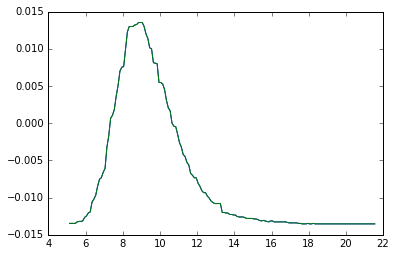

In [61]:
pylab.plot(xdata, ydata - (np.max(ydata) / 2))
pylab.plot(xdata, spline(xdata))

In [46]:
histo_fwhm / fit_fwhm

0.0

In [47]:
WeibullFunc().estimate_initial_parameters(fit.data.xdata, fit.data.ydata)

InvalidInitialParams: Parameter lambda  (value: 0.0) is outside of its bounds (0.001, inf)

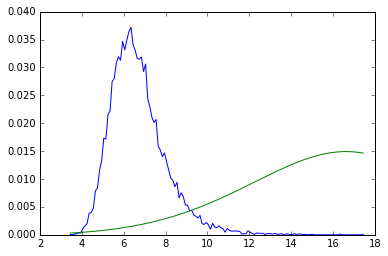

In [39]:
# pylab.plot(bincenters, values)
pylab.plot(fit.data.xdata, fit.data.ydata)
pylab.plot(fit.data.xdata, fit.function.fit_function(fit.data.xdata, 20, 5, -2.5))

In [11]:
np.sum(fit.data.ydata)

1.0

In [12]:
params, pcov = fit.do_fit()
params, pcov

ValueError: too many values to unpack (expected 2)

In [ ]:
pylab.plot(bincenters, values)
pylab.plot(fit.data.xdata, fit.function.fit_function(fit.data.xdata, *params))
initial_pars = fit.function.estimate_initial_parameters(fit.data.xdata, fit.data.ydata)
pylab.plot(
    fit.data.xdata, 
    fit.function.fit_function(fit.data.xdata, *initial_pars[0])) 
          

In [ ]:
initial_pars

In [ ]:
func = fit.function.estimate_initial_parameters()

In [ ]:
np.arange(0, 10)

In [ ]:
lambda_par, k, b = 0.03,  5.  , -2.5 
x = fit.data.xdata
x = (x + b) 
result = np.where(
  x < 0,
  0,
  (k / lambda_par) * (x / lambda_par) ** (k - 1) * np.exp(-(x / lambda_par)**k)
)
result / result.sum()

In [ ]:
 (k / lambda_par) * (x / lambda_par) ** (k - 1) * np.exp(-(x / lambda_par)**k)

In [ ]:
 (x / lambda_par) ** (k - 1

In [ ]:
np.exp(-(x / lambda_par)

In [ ]:
(x / lambda_par)

In [ ]:
fit.function.fit_function(fit.data.xdata, 1, 5, .05, -30)